# Match-filtering SNR v.s Amplitude-over-variance SNR

In [22]:
import sys, os
sys.path.append(os.path.abspath(''))   # 把当前目录设为引用模块的地址之一

from utils import *
from data_utils import *
from models.solver_cnn import *
from models.ConvNet import *

import numpy as np
import pandas as pd
from itertools import product, permutations

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-re00loading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Easily Profile Python Code in Jupyter
# install conda install line_profiler or pip install line-profiler
# see http://mortada.net/easily-profile-python-code-in-jupyter.html
%load_ext line_profiler

test_ctx()

data_address = './data_SNR_def/'

/Users/Herb/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 28] No space left on device.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


CPU or GPU? :  cpu(0)


## SNRmf from fixxed noises

In [2]:
file_address = './data_SNRmf/'
data = {}
for type_ in ['train', 'test']:
    for file in ['%s_SNRmf_%s.csv' %(type_, i) for i in range(1, 11)]:
        data['%s_%s' %(type_, file.split('.')[0].split('_')[-1])] = pd.read_csv(file_address + file, 
                                                                                header=None)

data.keys()

dict_keys(['train_1', 'train_2', 'train_3', 'train_4', 'train_5', 'train_6', 'train_7', 'train_8', 'train_9', 'train_10', 'test_1', 'test_2', 'test_3', 'test_4', 'test_5', 'test_6', 'test_7', 'test_8', 'test_9', 'test_10'])

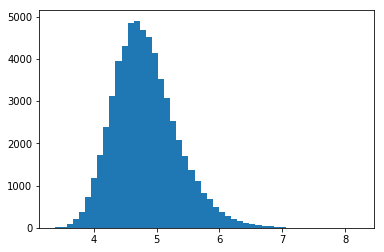

4.826940708332831


In [10]:
# plt.figure(figsize=(15,15))
plt.hist(data['train_1'].values[:,1].tolist(), bins = 50)
plt.show()
print(data['train_1'].values[:,1].mean())

5.233368525689253
5.160677699989758
5.085883928899126
5.1616683085564645
5.157713978830782
5.132572873811893
5.167303897706463
5.137524369947474
5.182973843013832
5.142550188184117


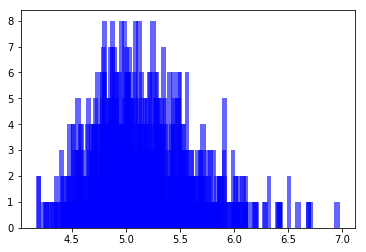

In [18]:
tt = data['train_1'].iloc[:,0]
for mass in tt.unique()[:10]:
    data_ = data['train_1'][data['train_1'].iloc[:,0] == mass]
    plt.hist(data_.values[:,1].tolist(), bins = 50, color='b', alpha=0.6)
    print(data_.values[:,1].mean())

4.773915635808653
4.638973253948733
4.760282889386312
4.731012059166329
4.754478474572082
4.683339074843394
4.686685697032726
4.711102105149762
4.869801810004876
4.673346657708272


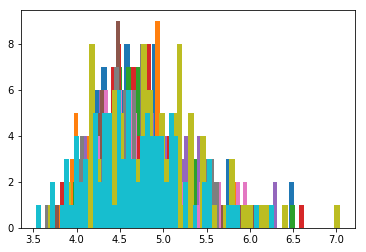

In [20]:
tt = data['train_1'].iloc[:,0]
for mass in tt.unique()[-10:]:
    data_ = data['train_1'][data['train_1'].iloc[:,0] == mass]
    plt.hist(data_.values[:,1].tolist(), bins = 50)
    print(data_.values[:,1].mean())

In [ ]:
# data['train_1'][[0]]. == '5.00|5.50'

## General analysis

In [29]:
GW_address = './data/'

data = pd.DataFrame(np.load(GW_address+'GW_H1.npy'), index=np.load(GW_address+'GW_H1_index.npy'))
print(data.shape)
peak_samppoint = data.values.argmax(axis=1)
peak_samppoint = int(peak_samppoint.sum() / peak_samppoint.shape[0])
peak_time = peak_samppoint/data.shape[-1]
peak_time = float('{:.2f}'.format(peak_time))
print('Peak sampling point at %dth (%.2fs).' %(peak_samppoint, peak_time))
data.head()
# 波形数据

(1249, 8192)
Peak sampling point at 7371th (0.90s).


,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
4.00|4.00,-9.812433e-23,-1.016813e-22,-1.049325e-22,-1.078680e-22,-1.104788e-22,-1.127572e-22,-1.146961e-22,-1.162896e-22,-1.175328e-22,-1.184220e-22,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4.00|4.40,-1.152648e-22,-1.178176e-22,-1.200368e-22,-1.219158e-22,-1.234493e-22,-1.246330e-22,-1.254633e-22,-1.259379e-22,-1.260552e-22,-1.258150e-22,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4.00|4.80,9.079569e-23,8.562824e-23,8.023045e-23,7.461677e-23,6.880222e-23,6.280235e-23,5.663323e-23,5.031138e-23,4.385375e-23,3.727764e-23,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4.00|5.20,-1.294046e-22,-1.266225e-22,-1.235170e-22,-1.200961e-22,-1.163684e-22,-1.123433e-22,-1.080311e-22,-1.034427e-22,-9.858974e-23,-9.348458e-23,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
4.00|5.60,1.393361e-23,2.107371e-23,2.816331e-23,3.518515e-23,4.212210e-23,4.895727e-23,5.567399e-23,6.225586e-23,6.868683e-23,7.495120e-23,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


总波形数目： (1249,)
训练集波形数目： 600
测试集波形数目： 649


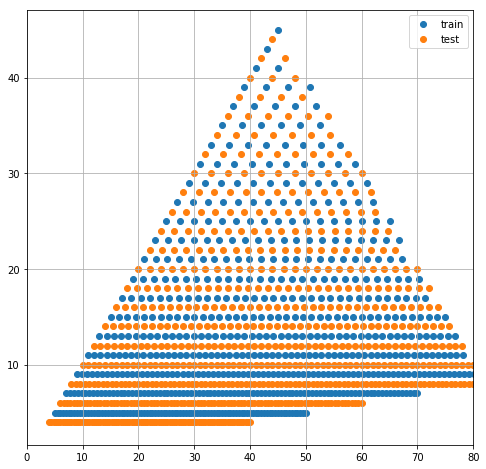

In [30]:
print('总波形数目：', data.index.shape)
train_masses = [(float(masses.split('|')[0]), float(masses.split('|')[1])) for masses in data.index if float(masses.split('|')[0]) % 2 != 0]
test_masses = [(float(masses.split('|')[0]), float(masses.split('|')[1])) for masses in data.index if float(masses.split('|')[0]) % 2 == 0]
print('训练集波形数目：', len(train_masses))
print('测试集波形数目：', len(test_masses))

train_m1, train_m2 = [ m[0] for m in train_masses],  [ m[1] for m in train_masses]
test_m1, test_m2 = [ m[0] for m in test_masses],  [ m[1] for m in test_masses]
plt.figure(figsize= (8,8))
plt.scatter(train_m2, train_m1, label='train')
plt.scatter(test_m2, test_m1, label = 'test')
plt.grid()
plt.legend()
plt.xlim(0,80)
# plt.title('训练集和测试集的波形在质量上的分布')
plt.show()

# 做好训练集和测试集的分割~

test_masses = [masses for masses in data.index if float(masses.split('|')[0]) % 2 == 0]
train_masses = [masses for masses in data.index if float(masses.split('|')[0]) % 2 != 0]
train_data = data.loc[train_masses]
test_data = data.loc[test_masses]

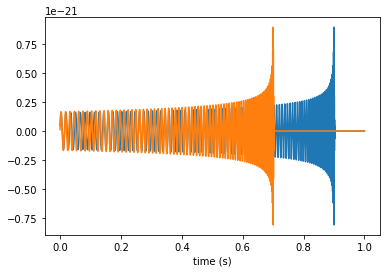

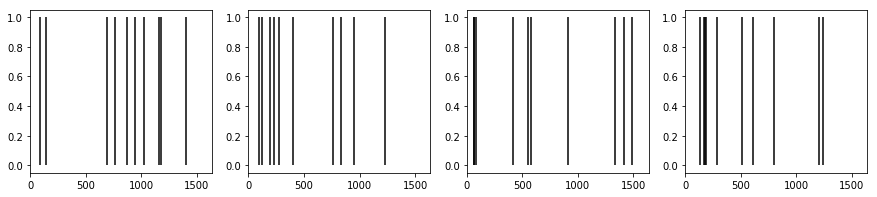

In [32]:
# def forward_moving_wave(data, a):
#     return np.concatenate((data.values[:,a:], np.array([data.values[0,-1]]*data.shape[0]*a).reshape(-1,a)), axis = 1)

# def shuffle_data(data, times):
#     shift_list = np.random.uniform(0, peak_samppoint - round((peak_time-0.2)*data.shape[-1]), size = (times))
#     base = forward_moving_wave(data, int(shift_list[0]))
    
#     index = []    
#     index.extend(data.index.tolist())
#     for shift_size in shift_list[1:]:
#         temp = forward_moving_wave(data, int(shift_size))
#         base = np.concatenate((base, temp) , axis = 0)    
#         index.extend(data.index.tolist())
#     return pd.DataFrame(base, index=index), np.array([ [s]*train_data.shape[0] for s in shift_list]).reshape(-1,)
peak_samppoint, peak_time = cal_peak_nd(nd.array(train_data))
plt.plot(np.linspace(0,1,num=data.shape[-1]),train_data.values[0,:])
plt.plot(np.linspace(0,1,num=data.shape[-1]),forward_moving_wave_nd(nd.array(train_data,ctx=mx.cpu()), peak_samppoint - round((peak_time-0.2)*data.shape[-1])).asnumpy()[0,:])
plt.xlabel('time (s)')
plt.show()
# 瞅一眼0.7~0.9的波形挪动的差别
plt.figure(figsize=(15,3))
for i in range(1, 5):
    plt.subplot(1,4,i)
    plt.vlines(np.random.uniform(0, 7371 - 5734, size = (10)), 0,1)
    plt.xlim(0,7371 - 5734)

In [5]:
# %timeit _ = shuffle_data_nd(nd.array(data, ctx=mx.cpu()),peak_samppoint, peak_time, 10)
# 1.21 s ± 14.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

In [11]:
def gen_SNRmf(data, SNR, shift = 0, rand = False, times = 10):
    snr_mf_list = []
    if shift:
        data = pd.DataFrame(forward_moving_wave_nd(nd.array(data, ctx=mx.cpu()), 
                                      peak_samppoint - int((peak_time-shift)*data.shape[-1])).asnumpy())

    for i in range(times):
        param_noise = Pre_zero(size = data.shape)
        noise, _ = TimeseriesFromPSD_nd(param_noise)
        noise = noise.asnumpy()
        
        sigma = data.max(axis=1) / float(SNR) / noise.std(axis=1)
        signal = data.div(sigma, axis=0)
        sim = signal + noise

        SNR_mf = SNR_MF(sim, noise, signal)
        snr_mf_list.extend(SNR_mf.tolist())
    return snr_mf_list

In [111]:
# SNRmf_times = {}
# for time in range(1, 10+1):
#     SNRmf_times[time] = gen_SNRmf(data, SNR = 1, shift = 0, times = time)
# np.save('SNRmf_times_SNR10', SNRmf_times)

/Users/Herb/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:475: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  grid,delta = np.linspace(a,b,gridsize,retstep=True)


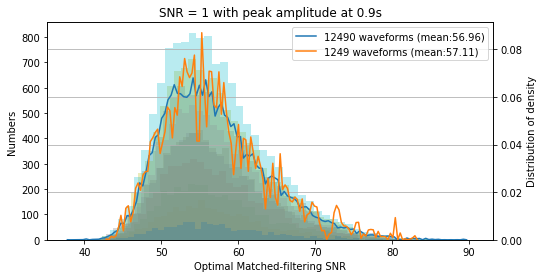

In [23]:
SNRmf_times = np.load(data_address + 'SNRmf_times_SNR10.npy').tolist()
import matplotlib.mlab as mlab
plt.figure(figsize=(8,4))
for time in range(1, 10+1):
    plt.hist(SNRmf_times[time], bins = 50, alpha = 0.3)

plt.hist(SNRmf_times[1], bins = 50, alpha = 0.2)
plt.ylabel('Numbers')
plt.xlabel('Optimal Matched-filtering SNR')

plt.twinx()
sns.kdeplot(SNRmf_times[10], bw=.15, label = '12490 waveforms (mean:%.2f)' %np.mean(SNRmf_times[10]))
sns.kdeplot(SNRmf_times[1], bw=.15, label = '1249 waveforms (mean:%.2f)' %np.mean(SNRmf_times[1]))
plt.ylabel('Distribution of density')
plt.title('SNR = 1 with peak amplitude at 0.9s')
plt.grid()
plt.show()

In [ ]:
# SNRmf_times = {}
# for SNR in np.linspace(0.1, 1, num=10):
#     SNRmf_times[SNR] = gen_SNRmf(data, SNR = SNR, shift = 0, times = 10)
# np.save('SNRmf_times_diffSNR', SNRmf_times)

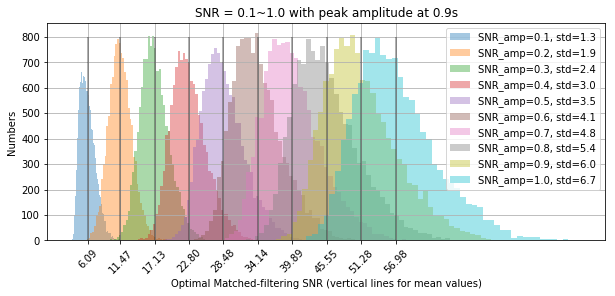

In [24]:
SNRmf_SNR = np.load(data_address+'SNRmf_times_diffSNR.npy').tolist()
mean_list = []
import matplotlib.mlab as mlab
plt.figure(figsize=(10,4))
for SNR in np.linspace(0.1, 1, num=10):
    plt.hist(SNRmf_SNR[SNR], bins = 50, alpha = 0.4, label = 'SNR_amp=%.1f, std=%.1f' %(SNR,np.std(SNRmf_SNR[SNR])))
    plt.vlines(x=np.mean(SNRmf_SNR[SNR]), ymin=0, ymax=800, alpha = .4, color = 'black')
    mean_list.append(round(np.mean(SNRmf_SNR[SNR])*100)/100)
    
plt.ylabel('Numbers')
plt.xlabel('Optimal Matched-filtering SNR (vertical lines for mean values)')
plt.legend()
plt.title('SNR = 0.1~1.0 with peak amplitude at 0.9s')
plt.xticks(mean_list, rotation=45)
plt.grid()
plt.show()

In [25]:
# for i, shft in enumerate(list([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7])):

#     SNRmf_times = {}
#     for SNR in np.linspace(0.1, 1, num=10):
# #         data0 = forward_moving_wave_nd(nd.array(data, ctx=mx.cpu()), 
# #                                           peak_samppoint - int((peak_time-shft)*data.shape[-1]))
#         SNRmf_times[SNR] = gen_SNRmf(data, SNR = SNR, shift = shft, times = 10)
#     np.save('SNRmf_times_diffSNR_shift0%s' %(i+1), SNRmf_times)

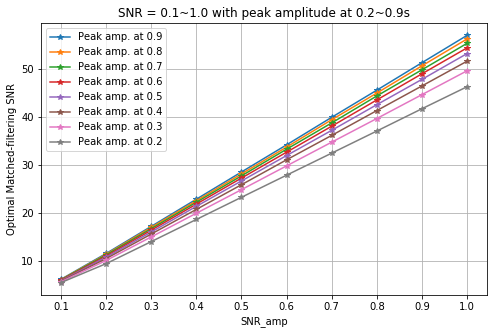

In [27]:
plt.figure(figsize=(8,5))

SNRmf_SNR = np.load(data_address+'SNRmf_times_diffSNR.npy').tolist()
mean_list = []
for SNR in np.linspace(0.1, 1, num=10):
    mean_list.append(round(np.mean(SNRmf_SNR[SNR])*100)/100)
plt.plot(np.linspace(0.1,1,10), mean_list, '*-', label = 'Peak amp. at 0.%s' %(9), )

for i in list(range(7)):
    SNRmf_shift = np.load(data_address+'SNRmf_times_diffSNR_shift0%s.npy' %(i+1)).tolist()
    
    mean_list = []
    for SNR in np.linspace(0.1, 1, num=10):
        mean_list.append(round(np.mean(SNRmf_shift[SNR])*100)/100)
    plt.plot(np.linspace(0.1,1,10), mean_list, '*-', label = 'Peak amp. at 0.%s' %(9-i-1), )

plt.xlabel('SNR_amp')
plt.ylabel('Optimal Matched-filtering SNR')
plt.legend()
plt.title('SNR = 0.1~1.0 with peak amplitude at 0.2~0.9s')
plt.xticks(np.linspace(0.1,1,10))
plt.grid()
plt.show()

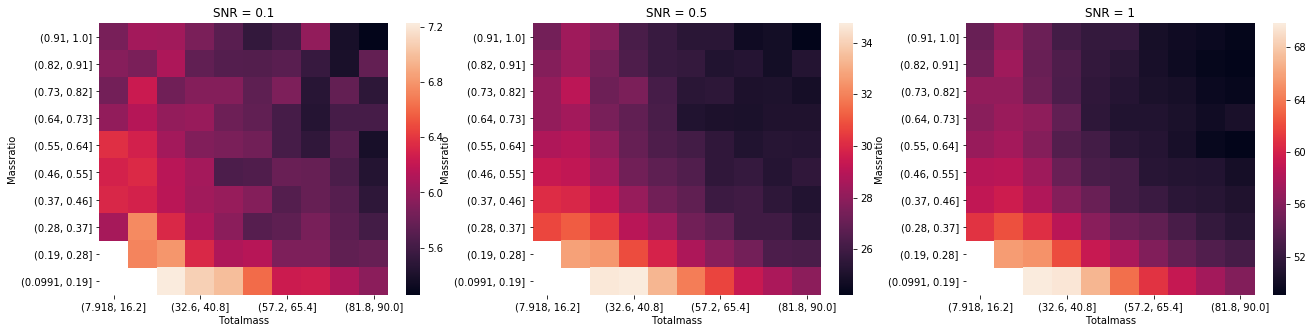

In [61]:
data0 = data
data0['Totalmass'] = data0.index.map(lambda x: float(x.split('|')[0])+float(x.split('|')[1]))
data0['Massratio'] = data0.index.map(lambda x: float(x.split('|')[0])/float(x.split('|')[1]))
data0['Totalmass'] = pd.cut(data0.Totalmass, 10)
data0['Massratio'] = pd.cut(data0.Massratio, 10)

SNRmf_times = np.load(data_address+'SNRmf_times_diffSNR.npy').tolist()
plt.figure(figsize=(22,5))

for i, snr in enumerate(list([0.1,0.5,1])):
    heatmap_data0 = pd.DataFrame({'snr_mf': SNRmf_times[snr],
              'Totalmass': np.array(data0['Totalmass']).tolist() *10,
              'Massratio': np.array(data0['Massratio']).tolist() *10
             })
    plt.subplot(1,3,i+1)
    heatmap_data0 = heatmap_data0.pivot_table(values = 'snr_mf', index='Massratio', columns='Totalmass',aggfunc='mean')
    sns.heatmap(heatmap_data0.sort_index(axis=0,ascending=False),xticklabels=3)
    plt.title('SNR = %s' %snr)